# Analysis of results from L-type Calcium channel ABC calibration

This notebook compares the behaviour of the $I_\text{CaL}$ current in Nygren, Courtemanche and standardised formulations.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from pyabc import History
from pyabc.weighted_statistics import weighted_mean, weighted_median

from ionchannelABC.visualization import plot_variables
from ionchannelABC.utils import weighted_cv

INFO:myokit:Loading Myokit version 1.28.3


## Load pyABC results databases for each run

Assumes that the results databases are stored in a subdirectory called `results'.

Loads history files and converts to dataframes and weights (see pyABC documentation).

#### Nygren

In [5]:
h_nyg_d_original = History('sqlite:///results/nygren/ical/original/nygren_ical_dgate_original.db')
h_nyg_f_original = History('sqlite:///results/nygren/ical/original/nygren_ical_fgates_original.db')

In [6]:
# Nygren uses the same dataset for fgates between original and unified
h_nyg_d_unified = History('sqlite:///results/nygren/ical/unified/nygren_ical_dgate_unified.db')

In [7]:
df_nyg_d_original, w_nyg_d_original = h_nyg_d_original.get_distribution(m=0)
df_nyg_f_original, w_nyg_f_original = h_nyg_f_reported.get_distribution(m=0)

In [9]:
df_nyg_d_unified, w_nyg_d_unified = h_nyg_d_unified.get_distribution(m=0)

#### Courtemanche

In [11]:
h_cou_d_original = History('sqlite:///results/courtemanche/ical/original/courtemanche_ical_dgate_original.db')
h_cou_f_original = History('sqlite:///results/courtemanche/ical/original/courtemanche_ical_fgate_original.db')

In [12]:
h_cou_d_unified = History('sqlite:///results/courtemanche/ical/unified/courtemanche_ical_dgate_unified.db')
h_cou_f_unified = History('sqlite:///results/courtemanche/ical/unified/courtemanche_ical_fgate_unified.db')

In [13]:
df_cou_d_original, w_cou_d_original = h_cou_d_original.get_distribution(m=0)
df_cou_f_original, w_cou_f_original = h_cou_f_original.get_distribution(m=0)

In [14]:
df_cou_d_unified, w_cou_d_unified = h_cou_d_unified.get_distribution(m=0)
df_cou_f_unified, w_cou_f_unified = h_cou_f_unified.get_distribution(m=0)

#### Standardised

In [15]:
h_sta = History('sqlite:///results/standardised/ical/standardised_ical.db')

In [16]:
df_sta, w_sta = h_sta.get_distribution(m=0)

## Compare number of gating parameters in models

Generate bar plot using manually input numbers. See models and publications for source.

In [18]:
parameter_number = pd.DataFrame([['N',6,10],['C',5,7],['S',4,5]], 
                                columns = ['model', 'act', 'inact'])

In [19]:
parameter_number.inact = parameter_number.act + parameter_number.inact

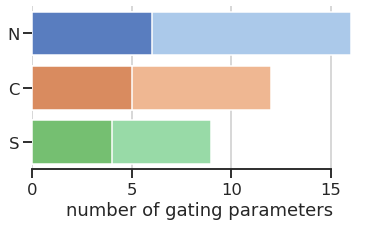

In [20]:
sns.set(style="ticks")
sns.set_context("talk")
sns.set_color_codes("pastel")

mpl.rcParams["font.size"] = 14
mpl.rcParams["legend.fontsize"] = 14

f, ax = plt.subplots(figsize=(6,3))

sns.barplot(x="inact", y="model", hue="model", data=parameter_number,
            palette="pastel", dodge=False)

sns.set_color_codes("muted")
sns.barplot(x="act", y="model", hue="model", data=parameter_number,
            palette="muted", dodge=False)

handles, labels = ax.get_legend_handles_labels()
order = []
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          ncol=2, loc="lower right", frameon=False)
ax.set(xlabel="number of gating parameters")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [21]:
#f.savefig('figures/ical/param_num_compare.pdf')

## Compare calibration between original and unified datasets

Plot relative standard deviation (RSD) of parameter posteriors and gating functions for Nygren and Courtemanche using the original dataset and unified datasets.

Note: we use the term RSD instead of CV (coefficient of variation) to avoid confusion with conduction velocity.

#### Calculate RSD values for Nygren and Courtemanche models

In [29]:
rsd_nyg_d_original = weighted_cv(df_nyg_d_original, w_nyg_d_original, sample_size=len(df_nyg_d_original))
rsd_nyg_f_original = weighted_cv(df_nyg_f_original, w_nyg_f_original, sample_size=len(df_nyg_f_original))

rsd_nyg_original = pd.concat([rsd_nyg_d_original, rsd_nyg_f_original])
model = ['N',]*len(rsd_nyg_original)
data = ['ORIGINAL',]*len(rsd_nyg_original)
frame = {'model': model, 'data': data, 'RSD': rsd_nyg_original}
nyg_original = pd.DataFrame(frame)

In [30]:
rsd_nyg_d_unified = weighted_cv(df_nyg_d_unified, w_nyg_d_unified, sample_size=len(df_nyg_d_unified))

rsd_nyg_unified = pd.concat([rsd_nyg_d_unified, rsd_nyg_f_original])
model = ['N',]*len(rsd_nyg_unified)
data = ['UNIFIED',]*len(rsd_nyg_unified)
frame = {'model': model, 'data': data, 'RSD': rsd_nyg_unified}
nyg_unified = pd.DataFrame(frame)

In [31]:
rsd_cou_d_original = weighted_cv(df_cou_d_original, w_cou_d_original, sample_size=len(df_cou_d_original))
rsd_cou_f_original = weighted_cv(df_cou_f_original, w_cou_f_original, sample_size=len(df_cou_f_original))

rsd_cou_original = pd.concat([rsd_cou_d_original, rsd_cou_f_original])
model = ['C',]*len(rsd_cou_original)
data = ['ORIGINAL',]*len(rsd_cou_original)
frame = {'model': model, 'data': data, 'RSD': rsd_cou_original}
cou_original = pd.DataFrame(frame)

In [32]:
rsd_cou_d_unified = weighted_cv(df_cou_d_unified, w_cou_d_unified, sample_size=len(df_cou_d_unified))
rsd_cou_f_unified = weighted_cv(df_cou_f_unified, w_cou_f_unified, sample_size=len(df_cou_f_unified))

rsd_cou_unified = pd.concat([rsd_cou_d_unified, rsd_cou_f_unified])
model = ['C',]*len(rsd_cou_unified)
data = ['UNIFIED',]*len(rsd_cou_unified)
frame = {'model': model, 'data': data, 'RSD': rsd_cou_unified}
cou_unified = pd.DataFrame(frame)

In [33]:
rsd_compare = pd.concat([nyg_original, nyg_unified, cou_original, cou_unified])#, cou_reported, cou])

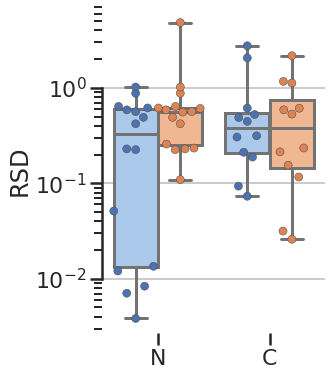

In [34]:
sns.set(style="ticks")
sns.set_context("poster")

# Initialize the figure
f, ax = plt.subplots(figsize=(4, 6))

# Plot the boxplot summary of RSD
sns.boxplot(x="model", y="RSD", hue="data", data=rsd_compare,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x="model", y="RSD", hue="data", data=rsd_compare,
              linewidth=0.5, size=8, dodge=True)

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set(ylabel="RSD")
ax.set_yscale('log')
ax.set(xlabel="")
sns.despine(trim=True, bottom=True)
ax.get_legend().remove()

In [35]:
diff = nyg_unified.RSD-nyg_original.RSD
stats.wilcoxon(diff)

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=0.0, pvalue=0.027707849358079864)

In [36]:
stats.mannwhitneyu(rsd_compare[(rsd_compare.model=='N') & (rsd_compare.data=='ORIGINAL')].RSD, 
                   rsd_compare[(rsd_compare.model=='C') & (rsd_compare.data=='ORIGINAL')].RSD)

MannwhitneyuResult(statistic=80.0, pvalue=0.2358950681666513)

In [37]:
stats.mannwhitneyu(rsd_compare[(rsd_compare.model=='N') & (rsd_compare.data=='UNIFIED')].RSD, 
                   rsd_compare[(rsd_compare.model=='C') & (rsd_compare.data=='UNIFIED')].RSD)

MannwhitneyuResult(statistic=80.0, pvalue=0.2358950681666513)

In [38]:
#f.savefig('figures/ical/rsd_compare.pdf')

#### Compare underlying gating functions for each model

Sample from posterior particle population and plot resulting gating functions

In [39]:
# Number of parameter samples
N = 100

In [40]:
nyg_par_samples_d_original = df_nyg_d_original.sample(n=N, weights=w_nyg_d_original, replace=True)
nyg_par_samples_d_original = nyg_par_samples_d_original.set_index([pd.Index(range(N))])
nyg_par_samples_f_original = df_nyg_f_original.sample(n=N, weights=w_nyg_f_original, replace=True)
nyg_par_samples_f_original = nyg_par_samples_f_original.set_index([pd.Index(range(N))])

nyg_par_samples_original = (pd.concat([nyg_par_samples_d_original, 
                                       nyg_par_samples_f_original],axis=1)
                            .to_dict(orient='records'))

In [41]:
nyg_par_samples_d_unified = df_nyg_d_unified.sample(n=N, weights=w_nyg_d_unified, replace=True)
nyg_par_samples_d_unified = nyg_par_samples_d_unified.set_index([pd.Index(range(N))])
nyg_par_samples_unified = (pd.concat([nyg_par_samples_d_unified, 
                                      nyg_par_samples_f_original], axis=1)
                           .to_dict(orient='records'))

In [43]:
v = np.arange(-100, 50, 0.5)

nyg_par_map = {'di': 'ical.d_inf',
                'dt': 'ical.tau_d',
                'fi1': 'ical.f_inf',
                'ft1': 'ical.tau_f_1',            
                'fi2': 'ical.f_inf',
                'ft2': 'ical.tau_f_2'}

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


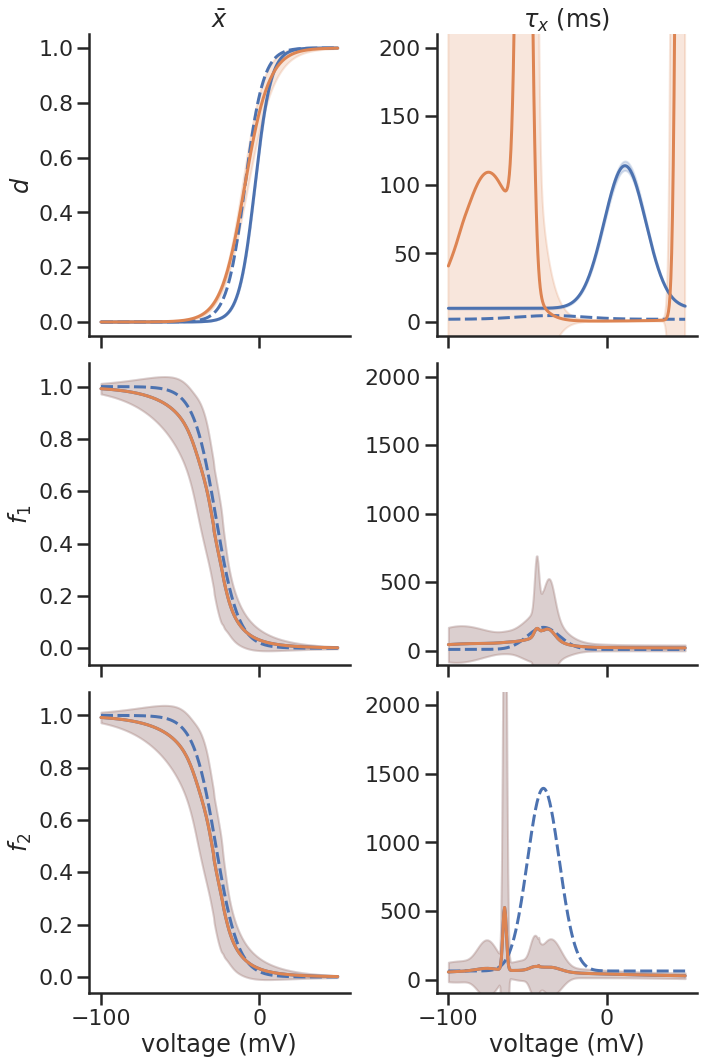

In [44]:
sns.set_context('poster')
sns.set_palette('deep')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plot_variables(v, [nyg_vars, nyg_vars], 
                       ['models/nygren_ical.mmt', 'models/nygren_ical_.mmt'], 
                       [nyg_par_samples_original, nyg_par_samples_unified],
                       original=[True,False],
                       figshape=(2,3))

ax[0][0].set_ylabel(r'$d$')
ax[1][0].set_ylabel(r'$f_1$')
ax[2][0].set_ylabel(r'$f_2$')
ax[0][0].set_title(r'$\bar{x}$')
ax[0][1].set_title(r'$\tau_x$ (ms)')
for a in ax[:,1].flatten():
    a.set_ylabel('')
for a in ax[2][:]:
    a.set_xlabel('voltage (mV)')

lim=200
ax[0][1].set_ylim((-0.05*lim, 1.05*lim))
lim=2000
ax[1][1].set_ylim((-0.05*lim, 1.05*lim))
lim=2000
ax[2][1].set_ylim((-0.05*lim, 1.05*lim))
    
plt.tight_layout()

In [45]:
#f.savefig('figures/ical/nyg_gating_functions.pdf')

In [48]:
cou_par_samples_d_original = df_cou_d_original.sample(n=N, weights=w_cou_d_original, replace=True)
cou_par_samples_d_original = cou_par_samples_d_original.set_index([pd.Index(range(N))])
cou_par_samples_f_original = df_cou_f_original.sample(n=N, weights=w_cou_f_original, replace=True)
cou_par_samples_f_original = cou_par_samples_f_original.set_index([pd.Index(range(N))])
cou_par_samples_original = (pd.concat([cou_par_samples_d_original, 
                                       cou_par_samples_f_original],axis=1)
                            .to_dict(orient='records'))

cou_par_samples_d_unified = df_cou_d_unified.sample(n=N, weights=w_cou_d_unified, replace=True)
cou_par_samples_d_unified = cou_par_samples_d_unified.set_index([pd.Index(range(N))])
cou_par_samples_f_unified = df_cou_f_unified.sample(n=N, weights=w_cou_f_unified, replace=True)
cou_par_samples_f_unified = cou_par_samples_f_unified.set_index([pd.Index(range(N))])
cou_par_samples_unified = (pd.concat([cou_par_samples_d_unified,
                                      cou_par_samples_f_unified], axis=1)
                           .to_dict(orient='records'))

In [49]:
cou_par_map = {'di': 'ical.d_inf',
               'dt': 'ical.tau_d',
               'fi': 'ical.f_inf',
               'ft': 'ical.tau_f'}

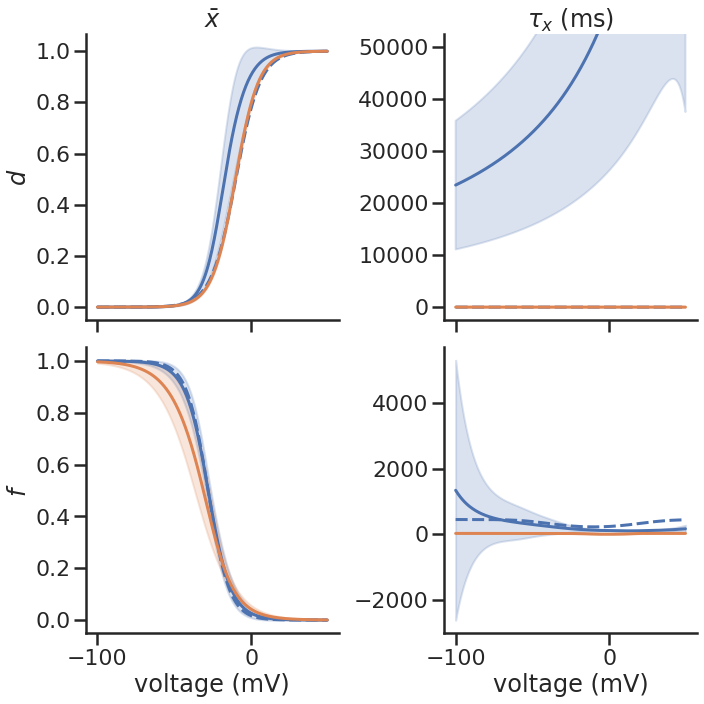

In [50]:
from ionchannelABC.visualization import plot_variables
sns.set_context('poster')
sns.set_palette('deep')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plot_variables(v, [cou_par_map, cou_par_map], 
                       ['models/courtemanche_ical.mmt', 'models/courtemanche_ical_.mmt'], 
                       [cou_par_samples_original, cou_par_samples_unified],
                       original=[True,False],
                       figshape=(2,2))

ax[0][0].set_ylabel(r'$d$')
ax[1][0].set_ylabel(r'$f$')

ax[0][0].set_title(r'$\bar{x}$')
ax[0][1].set_title(r'$\tau_x$ (ms)')

for a in ax[:,1].flatten():
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')

ax[0,1].set_ylim((-0.05*50000, 1.05*50000))
    
plt.tight_layout()

In [51]:
#f.savefig('figures/ical/cou_gating_functions.pdf')

## Compare all models calibrated to unified dataset

### RSD of parameter posteriors

In [52]:
rsd_sta = weighted_cv(df_sta, w_sta, sample_size=len(df_sta))
model = ['S',]*len(rsd_sta)
frame = {'model': model, 'RSD': rsd_sta}
sta = pd.DataFrame(frame)

In [53]:
rsd_unified = pd.concat([nyg_unified, cou_unified, sta], sort=False)

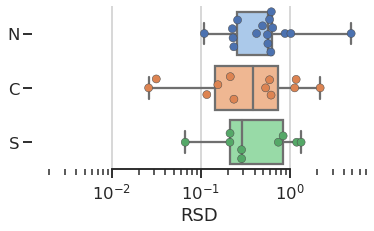

In [54]:
sns.set(style="ticks")
sns.set_context('talk')

# Initialize the figure
f, ax = plt.subplots(figsize=(6, 3))

sns.boxplot(x="RSD", y="model", data=rsd_unified,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x="RSD", y="model", data=rsd_unified,
              linewidth=0.5, size=8, dodge=True)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlabel="RSD")
ax.set_xscale("log")
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [55]:
#f.savefig('figures/ical/rsd_compare_unified.pdf')

In [56]:
stats.mannwhitneyu(rsd_unified[rsd_unified.model=='N'].RSD, 
                   rsd_unified[rsd_unified.model=='S'].RSD)

MannwhitneyuResult(statistic=68.0, pvalue=0.4214644472052549)

In [57]:
stats.mannwhitneyu(rsd_unified[rsd_unified.model=='C'].RSD, 
                   rsd_unified[rsd_unified.model=='S'].RSD)

MannwhitneyuResult(statistic=46.0, pvalue=0.29701617029952077)

In [58]:
stats.mannwhitneyu(rsd_unified[rsd_unified.model=='N'].RSD, 
                   rsd_unified[rsd_unified.model=='C'].RSD)

MannwhitneyuResult(statistic=80.0, pvalue=0.2358950681666513)

### Residuals to experimental data

In [59]:
# Sample number
N = 100

In [62]:
eps_nyg_d = h_nyg_d_unified.get_weighted_distances()
eps_nyg_f = h_nyg_f_original.get_weighted_distances()

eps_nyg = np.array([])
eps_nyg = (np.array(eps_nyg_d.sample(n=N, axis=0, weights=eps_nyg_d.w, replace=True).distance) +
           np.array(eps_nyg_f.sample(n=N, axis=0, weights=eps_nyg_f.w, replace=True).distance))
eps_nyg = pd.DataFrame({'model': 'N', 'eps': eps_nyg, 'exp': 'all'})

In [64]:
eps_cou_d = h_cou_d_unified.get_weighted_distances()
eps_cou_f = h_cou_f_unified.get_weighted_distances()

eps_cou = np.array([])
eps_cou = (np.array(eps_cou_d.sample(n=N,axis=0,weights=eps_cou_d.w,replace=True).distance) +
           np.array(eps_cou_f.sample(n=N,axis=0,weights=eps_cou_f.w,replace=True).distance))

eps_cou = pd.DataFrame({'model': 'C', 'eps': eps_cou, 'exp': 'all'})

In [65]:
eps_sta = h_sta.get_weighted_distances()
eps_sta = eps_sta.sample(n=100,axis=0,weights=eps_sta.w,replace=True).distance
eps_sta = pd.DataFrame({'model': 'S', 'eps': eps_sta, 'exp': 'all'})

In [66]:
eps = pd.concat([eps_nyg, eps_cou, eps_sta])

In [67]:
eps['normalised'] = (eps['eps']-eps['eps'].min())/(eps['eps'].max()-eps['eps'].min())

Text(0, 0.5, 'normalised residual')

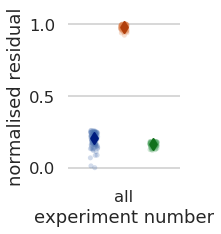

In [68]:
sns.set_context("talk")
sns.set_style("whitegrid")

mpl.rcParams["font.size"] = 14
mpl.rcParams["legend.fontsize"] = 14

f, ax = plt.subplots(figsize=(2, 3))
sns.despine(bottom=True, left=True)

sns.stripplot(x='exp', y='normalised', hue='model', data=eps, 
              dodge=True, jitter=True, alpha=.25, zorder=1,
              palette='deep', ax=ax)

sns.pointplot(x="exp", y="normalised", hue="model",
              data=eps,
              estimator=np.median,
              dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

ax.get_legend().remove()
ax.set_xlabel('experiment number')
ax.set_ylabel('normalised residual')

In [69]:
#f.savefig('figures/ical/eps_all_stripplot.pdf')

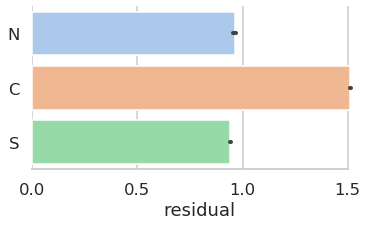

In [70]:
sns.set_context('talk')

f, ax = plt.subplots(figsize=(6,3))

sns.barplot(x="eps", y="model", data=eps, palette='pastel')

ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="residual")
sns.despine(trim=True, left=True)

In [71]:
#f.savefig('figures/ical/eps_all_barplot.pdf')

Below we sample from the posterior particle populations and run the calibration experiments to be able to calculate a per-experiment epsilon value.

In [74]:
nyg_par_samples_d = df_nyg_d_unified.sample(n=N, weights=w_nyg_d_unified, replace=True)
nyg_par_samples_d = nyg_par_samples_d.set_index([pd.Index(range(N))])
nyg_par_samples_d = nyg_par_samples_d.to_dict(orient='records')

nyg_par_samples_f = df_nyg_f_original.sample(n=N, weights=w_nyg_f_original, replace=True)
nyg_par_samples_f = nyg_par_samples_f.set_index([pd.Index(range(N))])
nyg_par_samples_f = nyg_par_samples_f.to_dict(orient='records')

cou_par_samples_d = df_cou_d_unified.sample(n=N, weights=w_cou_d_unified, replace=True)
cou_par_samples_d = cou_par_samples_d.set_index([pd.Index(range(N))])
cou_par_samples_d = cou_par_samples_d.to_dict(orient='records')

cou_par_samples_f = df_cou_f_unified.sample(n=N, weights=w_cou_f_unified, replace=True)
cou_par_samples_f = cou_par_samples_f.set_index([pd.Index(range(N))])
cou_par_samples_f = cou_par_samples_f.to_dict(orient='records')

std_par_samples = df_sta.sample(n=N, weights=w_sta, replace=True)
std_par_samples = std_par_samples.set_index([pd.Index(range(N))])
std_par_samples = std_par_samples.to_dict(orient='records')

In [75]:
from ionchannelABC.experiment import setup
from ionchannelABC.distance import IonChannelDistance

In [78]:
from experiments.ical_li import (li_act,
                                 li_act_tau,
                                 li_inact_1000,
                                 li_inact_kin_tauf_80,
                                 li_inact_kin_taus_80,
                                 li_recov_tauf,
                                 li_recov_taus)
experiments = [li_act,
               li_act_tau,
               li_inact_1000,
               li_inact_kin_tauf_80,
               li_inact_kin_taus_80,
               li_recov_tauf,
               li_recov_taus]
models = ['models/nygren_ical_adj.mmt',
          'models/courtemanche_ical.mmt',
          'models/standardised_ical.mmt']
pars = [[nyg_par_samples_d, nyg_par_samples_f], 
        [cou_par_samples_d, cou_par_samples_f],
        std_par_samples]
names = ['N','C','S']

In [79]:
def experiment_dist(pars, modelfile, experiment):
    eps = []
    observ, model, sum_stats = setup(modelfile,
                                     experiment)
    obs = observ.to_dict()['y']
    obs = {str(k): v for k, v in obs.items()}
    dist = IonChannelDistance(exp_id=list(observ.exp_id),
                              variance=list(observ.variance),
                              delta=0.05)
    for sample in pars:
        eps.append(dist(sum_stats(model(sample)), obs, None))    
    return eps

The below cell calculates the per-experiment distance and may take some time to run depending on number of samples.

In [80]:
df = pd.DataFrame({})
mask = [[0, 0, 1, 1, 1, 1, 1], [0, 0, 1, 1, 1, 1, 1], None]
for j, exp in enumerate(experiments):
    df_ = pd.DataFrame({})
    for i, m in enumerate(models):
        if mask[i] is not None:
            eps = np.array(
                experiment_dist(pars[i][mask[i][j]],
                                m,
                                exp)
                )
        else:
            eps = np.array(
                experiment_dist(pars[i],
                                m,
                                exp)
                )
        df_ = df_.append(pd.DataFrame({'model': names[i],
                                       'exp': str(j),
                                       'eps': eps[~np.isinf(eps)]}))
    eps_max = df_['eps'].max()
    eps_min = df_['eps'].min()
    df_['eps'] = (df_['eps'] - eps_min)/(eps_max-eps_min)
    df = df.append(df_)

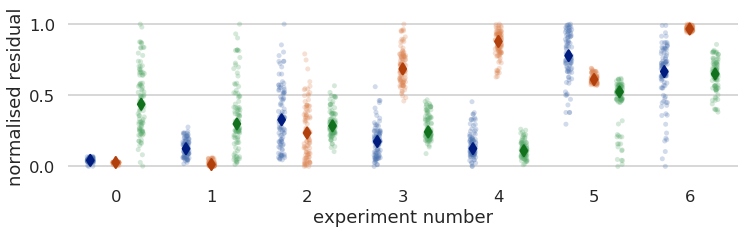

In [81]:
sns.set_context("talk")
sns.set_style("whitegrid")

mpl.rcParams["font.size"] = 14
mpl.rcParams["legend.fontsize"] = 14

fig, ax = plt.subplots(figsize=(12, 3))
sns.despine(bottom=True, left=True)

sns.stripplot(x='exp', y='eps', hue='model', data=df, 
              dodge=True, jitter=True, alpha=.25, zorder=1,
              palette='deep', ax=ax)

sns.pointplot(x="exp", y="eps", hue="model",
              data=df,
              estimator=np.median,
              dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="model",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=3, frameon=True)
ax.set_xlabel('experiment number')
ax.set_ylabel('normalised residual')
ax.get_legend().remove()

In [82]:
#fig.savefig('figures/ical/eps_per_exp_stripplot.pdf')

### Summary statistics compared to experimental data

In [83]:
from ionchannelABC.visualization import plot_sim_results

In [84]:
from experiments.ical_li import (li_act_and_tau,
                                 li_inact_1000,
                                 li_inact_kin_80,
                                 li_recov)

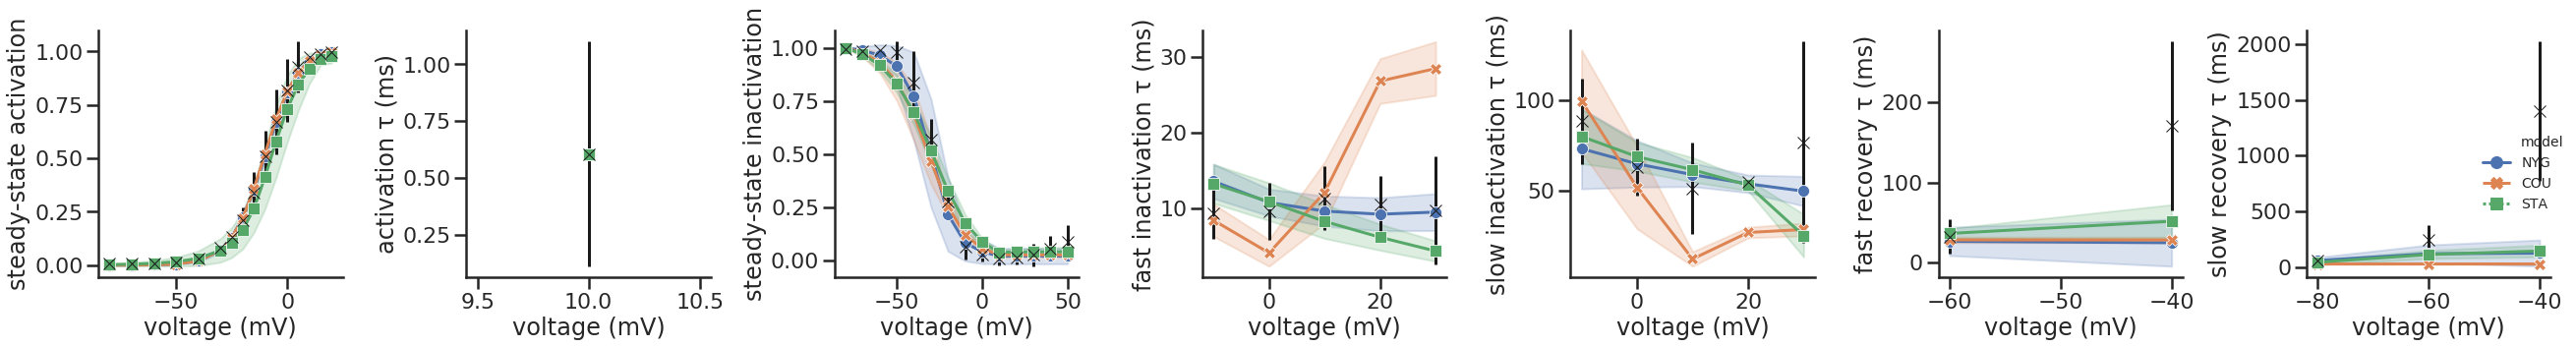

In [86]:
sns.set(style='ticks')
sns.set_context('poster')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = plot_sim_results(['models/nygren_ical.mmt',
                      'models/nygren_ical.mmt',
                      'models/courtemanche_ical.mmt',
                      'models/courtemanche_ical.mmt',
                      'models/standardised_ical.mmt'],
                     li_act_and_tau,
                     li_inact_1000,
                     li_inact_kin_80,
                     li_recov,
                     temp_match_model = 4, # scale to match S model temperature
                     masks=[[(0,1)]+[None,]*3,
                            [None]+[2,(3,4),(5,6)],
                            [(0,1)]+[None,]*3,
                            [None,]+[2,(3,4),(5,6)],
                            None],
                     df=[df_nyg_d_unified,
                         df_nyg_f_original,
                         df_cou_d_unified,
                         df_cou_f_unified,
                         df_sta], 
                     w=[w_nyg_d_unified,
                        w_nyg_f_original,
                        w_cou_d_unified,
                        w_cou_f_unified,
                        w_sta])

ylabels = ["steady-state activation", "activation τ (ms)", "steady-state inactivation",
           "fast inactivation τ (ms)", "slow inactivation τ (ms)", "fast recovery τ (ms)", 
           "slow recovery τ (ms)"]
for ax in g.axes.flatten():
    ax.set_xlabel("voltage (mV)")
for ax, yl in zip(g.axes.flatten(), ylabels):
    ax.set_ylabel(yl)
for ax in g.axes.flatten():
    ax.set_title("")

plt.tight_layout()

In [87]:
#g.savefig('figures/ical/compare_summary_statistics.pdf')

### Gating functions compared between models

In [88]:
nyg = 'models/nygren_ical_temp_adj.mmt' # temperature adjusted by scaling time constants with Q10 = 0.9
cou ='models/courtemanche_ical.mmt'
std = 'models/standardised_ical.mmt'

In [89]:
v = np.arange(-80, 50, 0.5)

In [90]:
# COU only has one gate so plot on both inactivation plots
cou_par_map = {'di': 'ical.d_inf',
               'fi1': 'ical.f_inf',
               'fi2': 'ical.f_inf',
               'dt': 'ical.tau_d',
               'ft1': 'ical.tau_f',
               'ft2': 'ical.tau_f'}

In [91]:
std_par_map = {'di': 'ical.d_ss',
               'fi1': 'ical.f_ss',
               'fi2': 'ical.f_ss',
               'dt': 'ical.tau_d',
               'ft1': 'ical.tau_f1',
               'ft2': 'ical.tau_f2'}

In [94]:
N = 100

nyg_par_samples_d_unified = df_nyg_d_unified.sample(n=N, weights=w_nyg_d_unified, replace=True)
nyg_par_samples_d_unified = nyg_par_samples_d_unified.set_index([pd.Index(range(N))])
nyg_par_samples_f_original = df_nyg_f_original.sample(n=N, weights=w_nyg_f_original, replace=True)
nyg_par_samples_f_original = nyg_par_samples_f_original.set_index([pd.Index(range(N))])
nyg_par_samples = (pd.concat([nyg_par_samples_d_unified, 
                              nyg_par_samples_f_original],axis=1)
                   .to_dict(orient='records'))

cou_par_samples_d = df_cou_d_unified.sample(n=N, weights=w_cou_d_unified, replace=True)
cou_par_samples_d = cou_par_samples_d.set_index([pd.Index(range(N))])
cou_par_samples_f = df_cou_f_unified.sample(n=N, weights=w_cou_f_unified, replace=True)
cou_par_samples_f = cou_par_samples_f.set_index([pd.Index(range(N))])
cou_par_samples = (pd.concat([cou_par_samples_d,
                              cou_par_samples_f],axis=1)
                   .to_dict(orient='records'))

std_par_samples = df_sta.sample(n=N, weights=w_sta, replace=True)
std_par_samples = std_par_samples.set_index([pd.Index(range(N))])
std_par_samples = std_par_samples.to_dict(orient='records')

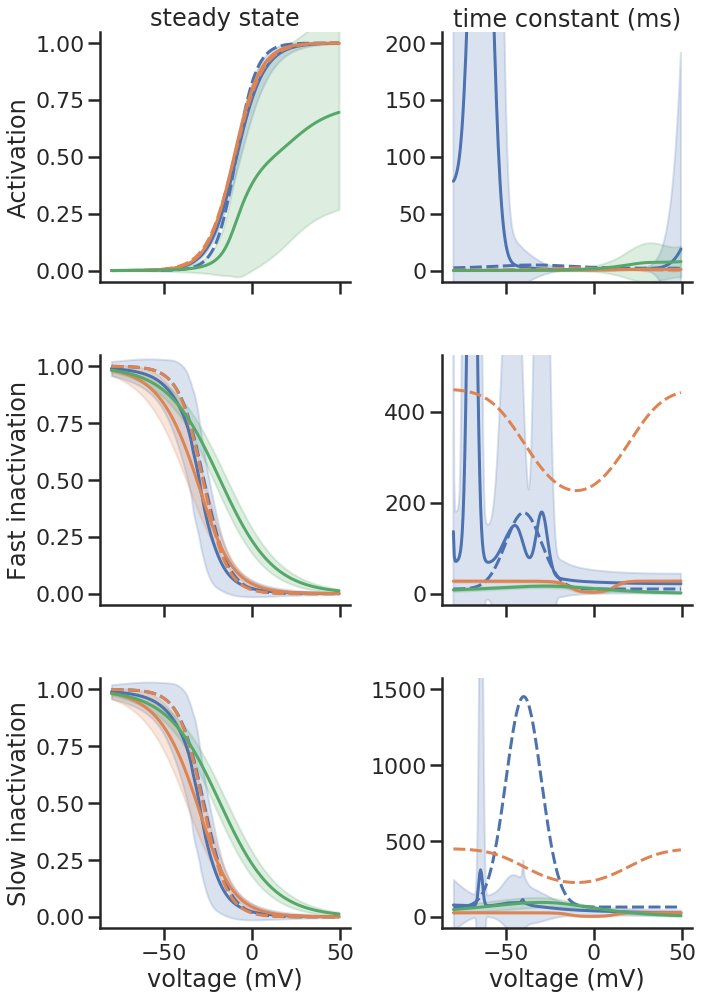

In [97]:
sns.set_context('poster')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plot_variables(v, [nyg_par_map, cou_par_map, std_par_map], 
                       [nyg, cou, std], 
                       [nyg_par_samples, cou_par_samples, std_par_samples],
                       original=[True, True, False],
                       figshape=(2,3))

ax[0][0].set_title('steady state')
ax[0][1].set_title('time constant (ms)')
ax[0][0].set_ylabel('Activation')
ax[1][0].set_ylabel('Fast inactivation')
ax[2][0].set_ylabel('Slow inactivation')

for a in ax[:,0]:
    a.set_ylim((-0.05, 1.05))
    
ax[0,1].set_ylim(-0.05*200, 200+0.05*200)
ax[1,1].set_ylim(-0.05*500, 500+0.05*500)
ax[2,1].set_ylim(-0.05*1500, 1500+0.05*1500)

for a in ax[:,1]:
    a.set_ylabel('')
    
for a in ax[2,:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
plt.tight_layout()

In [98]:
#f.savefig('figures/ical/compare_gating_functions.pdf')

### Compare final pulse after pulse train

In [99]:
import myokit

In [100]:
nsteps = 100
period = 1000
tstep = 200
vhold = -80
vstep = -10

pulsetrain = myokit.pacing.steptrain([vstep,]*nsteps,
                                     vhold,
                                     period-tstep,
                                     tstep)

In [101]:
# nygren_ina_full has had tau values adjusted for temperature to 310K
models = [myokit.load_model(modelfile) for modelfile in ['models/nygren_ical_temp_adj.mmt',
                                                         'models/courtemanche_ical.mmt',
                                                         'models/standardised_ical.mmt']]
for m in models:
    pace = m.get('membrane.V')
    if pace.binding() != 'pace':
        if pace.is_state():
            pace.demote()
        pace.set_rhs(0)
        pace.set_binding('pace')

In [102]:
sims = [myokit.Simulation(m, pulsetrain) for m in models]

In [103]:
par_samples = [nyg_par_samples, cou_par_samples, std_par_samples]

In [104]:
import time

all_samples = pd.DataFrame({})
for i, s in enumerate(sims):
    s.reset()
    # store original
    if models[i].name() != 'STA':
        datalog = s.run(pulsetrain.characteristic_time(),
                        log=['ical.g','engine.time','membrane.V'],
                        log_interval=0.5)
        datalog = datalog.trim((nsteps)*period-tstep-20, (nsteps)*period, adjust=True)
        df = {'time': datalog['engine.time'],
              'gate': datalog.npview()['ical.g']/max(datalog['ical.g']),
              'sample': 0,
              'model': models[i].name(),
              'type': 'original'}
        df = pd.DataFrame(df)
        all_samples = all_samples.append(df, ignore_index=True)
    
    # re-calibrated
    for j, par_sample in enumerate(par_samples[i]):
        s.reset()
        for p, v in par_sample.items():
            name = p
            value = v
            if p.startswith("log"):
                name = p[4:]
                value = 10**v
            s.set_constant(name, value)
            
        # Log run time for comparisons
        t0 = time.time()
        datalog = s.run(pulsetrain.characteristic_time(),
                        log=['ical.g','engine.time','membrane.V'],
                        log_interval=1)
        t1 = time.time()
        dt = t1-t0
        
        datalog = datalog.trim((nsteps)*period-tstep-20, (nsteps)*period, adjust=True)
        df = {'time': datalog['engine.time'],
              'gate': datalog.npview()['ical.g']/max(datalog['ical.g']),
              'sample': j,
              'model': models[i].name(),
              'type': 'recalibrated',
              'runtime': dt}
        df = pd.DataFrame(df)
        all_samples = all_samples.append(df, ignore_index=True)

In [105]:
recalibrated_df = all_samples[all_samples['type']=='recalibrated']

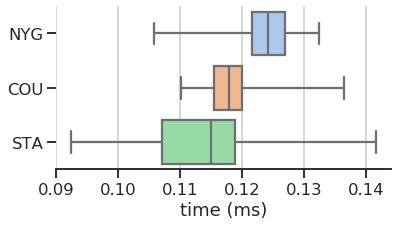

In [106]:
sns.set(style="ticks")
sns.set_context('talk')

# Initialize the figure
f, ax = plt.subplots(figsize=(6, 3))

sns.boxplot(x='runtime', y='model', data=recalibrated_df,
            palette="pastel", whis="range")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="time (ms)")
sns.despine(left=True)

In [107]:
#f.savefig('figures/ical/runtime_compare.pdf')

In [108]:
all_samples_detail = all_samples[(all_samples['time']>=19) & (all_samples['time'] < 30)]

Text(0.5, 1.0, '')

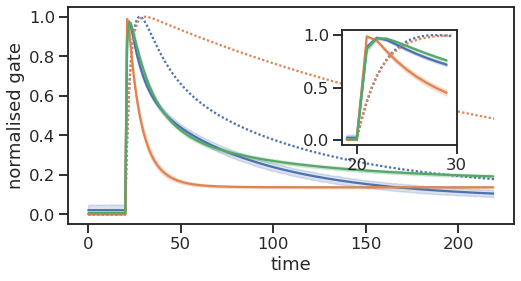

In [109]:
sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plt.subplots(figsize=(8,4))

g = sns.lineplot(x='time', y='gate', hue='model', style='type',
                 dashes = [(1,1),''],
                 data=all_samples, ax=ax,
                 legend=False)


ax2 = plt.axes([.6, .4, .2, .4])
sns.lineplot(x='time',y='gate',hue='model',style='type',
             dashes=[(1,1),''],
             data=all_samples_detail, ax=ax2,
             legend=False)
ax2.set_xlabel('')
ax2.set_ylabel('')

ax.set_ylabel('normalised gate')
ax.set_title('')

In [110]:
#f.savefig('figures/ical/trace_compare.pdf')